# Bell state and GHZ state

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from braket.circuits import Circuit, Gate, Instruction, circuit
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

In [2]:
ghz_2 = Circuit().h(0).cnot(0, 1) # bell state
ghz_3 = Circuit().h(0).cnot(0, 1).cnot(0, 2)

## Simulator

In [10]:
device = LocalSimulator()
counts_2 = device.run(ghz_2, shots=1000).result().measurement_counts
counts_3 = device.run(ghz_3, shots=1000).result().measurement_counts
print(counts_2)
print(counts_3)

Counter({'00': 524, '11': 476})
Counter({'111': 546, '000': 454})


## Hardware

In [4]:
# import boto3
# from braket.aws import AwsSession, AwsDevice

# region_name = "eu-west-2"
# endpoint_url = "https://5sk8cnl96i.execute-api.eu-west-2.amazonaws.com/Prod"
# # endpoint_url = "https://o8yrwb6mpk.execute-api.eu-west-2.amazonaws.com/Prod"

# braket_client = boto3.client("braket", region_name=region_name, endpoint_url=endpoint_url)
# aws_session = AwsSession(braket_client=braket_client)

In [18]:
from braket.aws import AwsDevice

device_arn = "arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy"
# device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"
# device = AwsDevice(device_arn, aws_session=aws_session)
device = AwsDevice(device_arn)

In [19]:
# task = AwsQuantumTask.create(aws_session, device_arn, ghz_2, s3_folder, shots=100)
task = device.run(ghz_2, shots=1000)
counts_hw2 = task.result().measurement_counts
# print(task.result())
print(counts_hw2)

Counter({'11': 392, '00': 336, '01': 177, '10': 95})


In [20]:
# task = AwsQuantumTask.create(aws_session, device_arn, ghz_4, s3_folder, shots=500)
task = device.run(ghz_3, shots=1000)
counts_hw3 = task.result().measurement_counts
# print(task.result())
print(counts_hw3)

Counter({'000': 287, '111': 280, '010': 117, '011': 94, '110': 81, '101': 62, '001': 54, '100': 25})


## See results

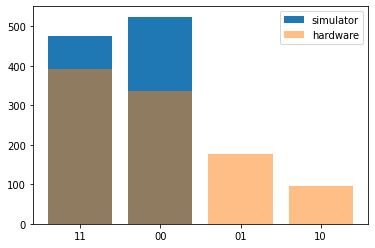

In [21]:
plt.bar(counts_2.keys(), counts_2.values())
plt.bar(counts_hw2.keys(), counts_hw2.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

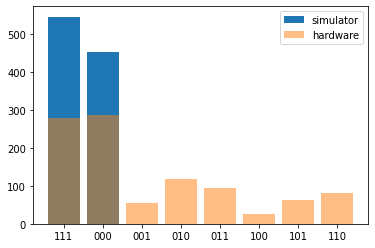

In [22]:
plt.bar(counts_3.keys(), counts_3.values())
plt.bar(counts_hw3.keys(), counts_hw3.values(), alpha=0.5)
plt.legend(['simulator','hardware'])